<a href="https://colab.research.google.com/github/Kgs-Mathaba/ARIMA_and_Seasonal_ARIMA/blob/main/ARIMA_and_Seasonal_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA and Seasonal ARIMA

## Autoregressive Integrated Moving Averages

The general process for ARIMA models is following:
- Visualize the Time Series Data
- Plot te correlation and Autocorrelation charts
- Construct the ARIMA model or Seasonal ARIMA based on the data
- Use the model to make prediction



In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df =pd.read_csv('/content/perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [7]:
# Cleaning the data
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [8]:
# drop the last 2 rows
df.drop([105,106], axis=0, inplace=True)

In [9]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [11]:
# Convert Month into Datetime
df['Month'] = pd.to_datetime(df['Month'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [13]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [14]:
df.shape

(105, 2)

In [15]:
# Set the Month as the index
df.set_index('Month', inplace=True)

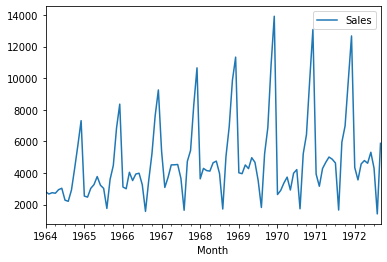

In [16]:
# Data looks seasonal
df.plot()

# The ADF tests the null hypothesis that a time series sample isn't stationary

In [17]:
# Test for stationarity
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
#H0: It is not stationary
#H1: It is stationary

def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADS Test Statistics', 'p-value', '#Lags Used', 'Number of Observations Used']
  for value, label in zip(result, labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print('Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root')
  else:
    print('Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary')

In [19]:
adfuller_test(df['Sales'])

ADS Test Statistics : -1.8335930563276228
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


# Make the data stationary


## Differencing

In [20]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [21]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [22]:
df.head(15)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [23]:
## Again test Dickey Fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADS Test Statistics : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root


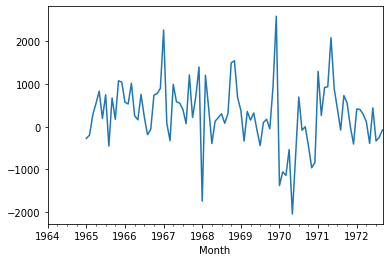

In [24]:
df['Seasonal First Difference'].plot()

# Auto Regressive Model

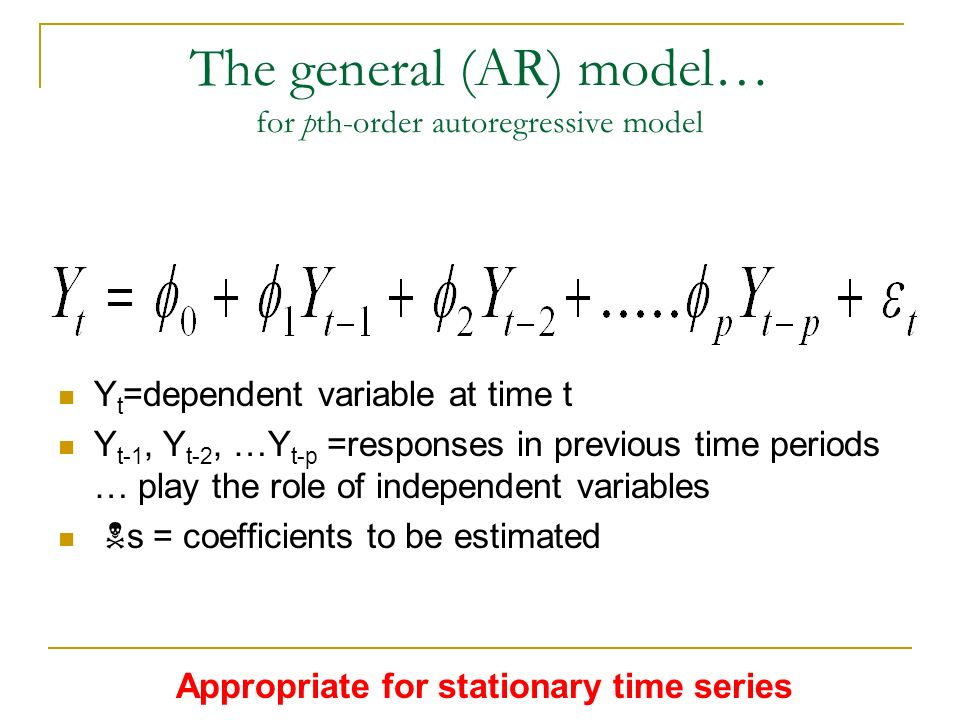


# The ARIMA model uses lag features

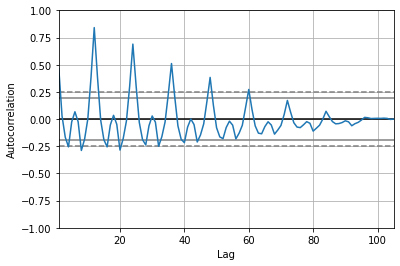

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

# Final Thoughts on Autocorrelation and Partial Autocorrelation

-  Identification of a AR model is often best done with the PACF.
  * For an AR model, the theoretical PACF "shuts off" past the order of the model. the phrase "shut off" means that in 
theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial 
autocorrelations gives the order of the AR model. By the "order of the model" we mean the extreme lag of that x that
is used as a predictor

- Identification of an MA (moving average) model is often best done with the ACF rather than the PACF
  * For a MA model, theoretical PACF does not shut off, but instead tapers towards 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.




In [28]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

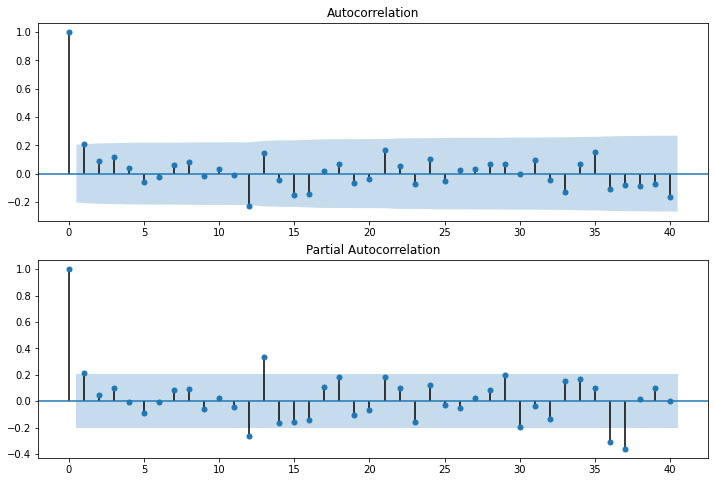

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)


ARIMA model takes 3 values:

- *p*: AR model lags
- *d*: differencing
- *q*: Moving average lags

In [32]:
# for non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [33]:
  model =ARIMA(df['Sales'], order=(1,1,1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [34]:
model_fit = model.fit()

In [35]:
model_fit

In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 12 Jun 2021   AIC                           1910.251
Time:                        16:51:33   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7848     12.405      1.837      0.069      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

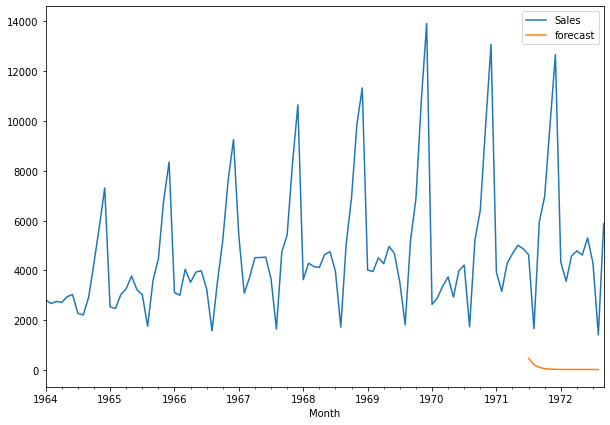

In [37]:
df['forecast'] = model_fit.predict(start=90, end=103, dynamic=True)
df[['Sales', 'forecast']].plot(figsize=(10,7))

In [38]:
model=sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


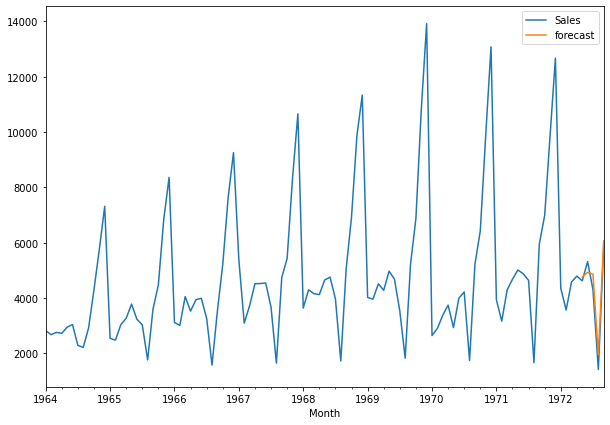

In [41]:
df['forecast']=results.predict(start=100, end=125, dynamic=True)
df[['Sales', 'forecast']].plot(figsize=(10,7))

In [42]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [45]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [46]:
future_dates_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [47]:
future_df = pd.concat([df,future_dates_df])

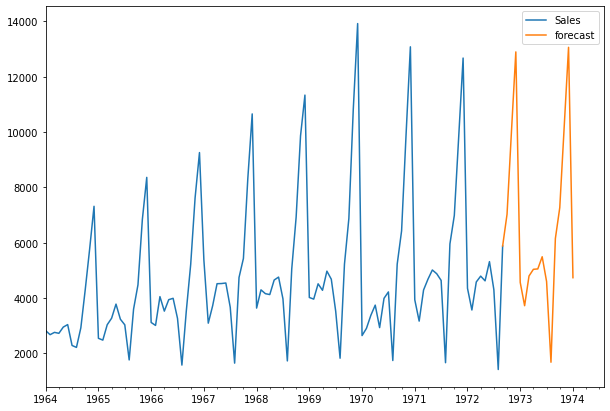

In [49]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic=True)
future_df[['Sales', 'forecast']].plot(figsize=(10,7))

In [ ]:
|